<a href="https://colab.research.google.com/github/thiagolermen/ml-course/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set. For each training example, you have the applicant's scores on two exams and the admissions decision. To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores using a somewhat confusingly-named technique called logistic regression.

## Imports

In [278]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [279]:
path = 'https://raw.githubusercontent.com/thiagolermen/ml-course/main/data/ex2data1.txt?token=AL353PG6ZD4354U2IPCXURDAXUEQK'
data = pd.read_csv(path, header=None, names=["Exam 1", "Exam 2", "Admitted"])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

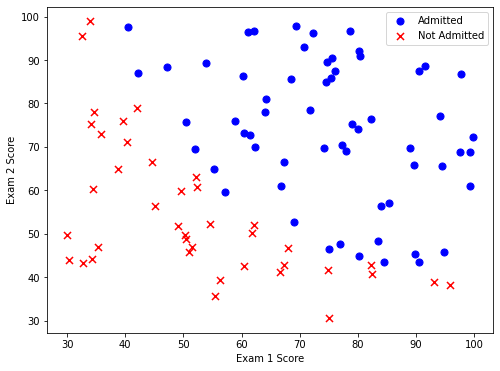

In [280]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [281]:
# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [282]:
print(f" X.shape: {X.shape} \n y.shape: {y.shape} \n theta.shape {theta.shape}")

 X.shape: (100, 3) 
 y.shape: (100, 1) 
 theta.shape (3,)


## Activation function

Sigmoid function

$
g(z) = \frac{1}{1+e^{-z}}
$

In [283]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

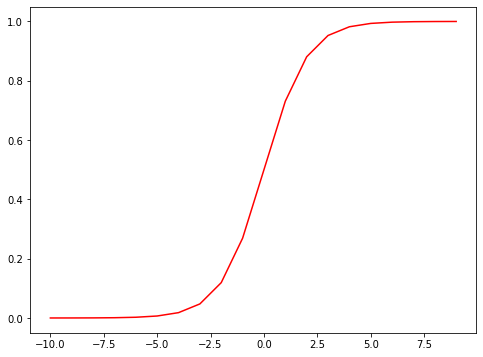

In [284]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(nums, sigmoid(nums), 'r')

## Cost function

Cost function

$J(\theta) = -\frac{1}{m} \displaystyle \sum _{i=1}^m \left [y^{(i)} \cdot log(h_\theta(x^{(i)})) + (1-y^{(i)}) \cdot log(1-h_\theta(x^{(i)})) \right]
$

In [285]:
def loss(theta, X, y):
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  z = X * theta.T
  h = sigmoid(z)
  first = np.multiply(y, np.log(h))
  second = np.multiply((1 - y), np.log(1 - h))
  return np.sum(first + second) / (-len(X))

In [286]:
loss(theta, X, y)

0.6931471805599453

## Gradient descent

Gradient descent

$\theta_j := \theta_j - \dfrac {\alpha}{m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j$

In [287]:
def gradient_descent(theta, X, y):
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)

  parameters = int(theta.ravel().shape[1])
  grad = np.zeros(parameters)

  z = X * theta.T
  h = sigmoid(z)
  error = h - y

  for i in range(parameters):
    term = np.multiply(error, X[:,i])
    grad[i] = np.sum(term) / (len(X))

  return grad


In [288]:
gradient_descent(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

Optimize gradient descent

In [289]:
import scipy.optimize as opt
def fit(theta, X, y):
  opt_weights = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient_descent,args=(X, y))
  return opt_weights

In [290]:
opt_weights = fit(theta, X, y)
cost(opt_weights[0], X, y)

0.20349770158947472

## Predictions

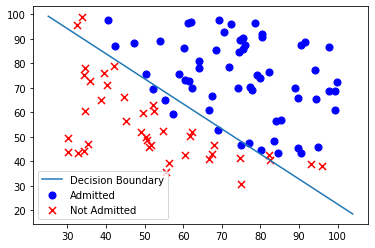

In [291]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (opt_weights[0][0] + np.dot(opt_weights[0][1], x_values)) / opt_weights[0][2]


plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
plt.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
plt.legend()